# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [7]:
df = pd.read_csv('previsao_de_renda.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.  


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

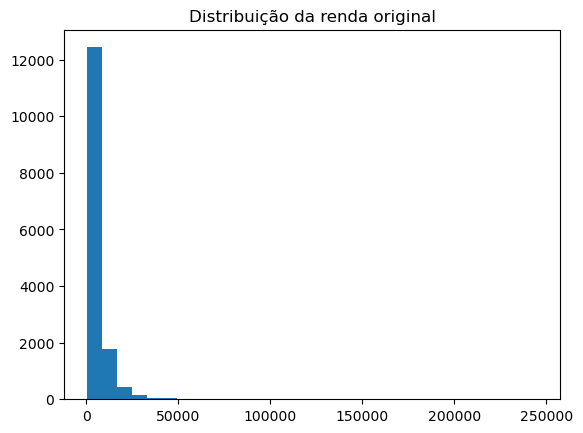

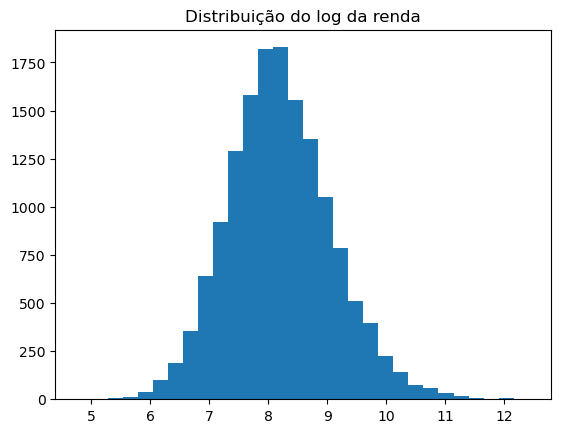

In [10]:
plt.hist(df['renda'], bins=30)
plt.title("Distribuição da renda original")
plt.show()

plt.hist(np.log(df['renda']), bins=30)
plt.title("Distribuição do log da renda")
plt.show()

In [17]:
formula_dummie = "np.log(renda) ~ idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia + \
           C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + \
           C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia)"


In [19]:
m = smf.ols(formula_dummie, data=df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:20:38   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [22]:
#Removendo todo mundo que ficou com o P-value acima de 0,05

formula_final = "np.log(renda) ~ idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia + \
                 C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + \
                 C(tipo_renda) + C(estado_civil)"

m_final = smf.ols(formula_final, data=df).fit()
print(m_final.summary())



                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     453.1
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:29:18   Log-Likelihood:                -13603.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12411   BIC:                         2.736e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [23]:
formula_final = "np.log(renda) ~ idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia + \
                 C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + \
                 C(tipo_renda) + C(estado_civil)"

m_final = smf.ols(formula_final, data=df).fit()
print(m_final.summary())


                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     453.1
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:32:53   Log-Likelihood:                -13603.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12411   BIC:                         2.736e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

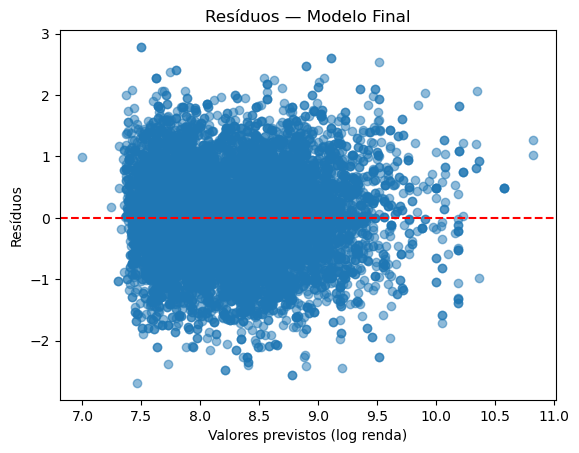

In [24]:
residuos = m_final.resid
plt.scatter(m_final.fittedvalues, residuos, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores previstos (log renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos — Modelo Final")
plt.show()


Pelo resultado do ajuste, segundo a lógica do R ajustado, o modelo explica em torno de 35% da variação da renda. As variáveis que mais influenciam são sexo, tempo de emprego, idade, posse de imóvel, posse de veículo e algumas categorias de tipo de renda e estado civil. Já categorias como Bolsista, Pensionista e União não mostraram efeito no modelo. Mesmo retirando algumas variáveis, o R² ajustado praticamente não mudou, então o modelo final ficou mais simples de interpretar sem perder qualidade.